In [1]:
%plot --format svg

In [2]:
frLow = 200
frHigh = 2600
bwRadio = frHigh - frLow
costasN = 8
deltaFcostas = bwRadio/costasN

frLow =  200
frHigh =  2600
bwRadio =  2400
costasN =  8
deltaFcostas =  300


In [3]:
BWchannel = 100000
pulseSamples = pow2(ceil(log2(BWchannel * 2/deltaFcostas)))
sampleRate = pulseSamples * deltaFcostas

BWchannel =  100000
pulseSamples =  1024
sampleRate =  307200


In [4]:
costasFreq = deltaFcostas:deltaFcostas:deltaFcostas * costasN

costasFreq =

    300    600    900   1200   1500   1800   2100   2400



In [5]:
costasFreqIdx = [ 1 8 3 6 2 7 5 4 ];

In [6]:
TimeCV = [0:1/sampleRate:2/deltaFcostas](:);
TimeLongCV = [0:1/sampleRate:2*costasN/deltaFcostas](:);
RefSigAllCoreCV = zeros(rows(TimeCV), 1);
RefSigCoreCV = [ 0 ];
for idx = 1:1:columns(costasFreq)
  SigLoopCV = -i * exp(i*pi*TimeCV*2*costasFreq(costasFreqIdx(idx)));
  RefSigAllCoreCV = RefSigAllCoreCV .+ SigLoopCV;
  RefSigCoreCV = vertcat(RefSigCoreCV, SigLoopCV(2:end));
endfor
RefSigInvCoreCV = [ 0 ];
for idx = 1:1:columns(costasFreq)
  RefSigInvCoreCV = vertcat(RefSigInvCoreCV, RefSigAllCoreCV(2:end));
endfor
RefSigInvCoreCV = RefSigInvCoreCV .- RefSigCoreCV;
size(TimeCV)
size(TimeLongCV)
size(RefSigCoreCV)
size(RefSigInvCoreCV)
size(RefSigAllCoreCV)

ans =

   2049      1

ans =

   16385       1

ans =

   16385       1

ans =

   16385       1

ans =

   2049      1



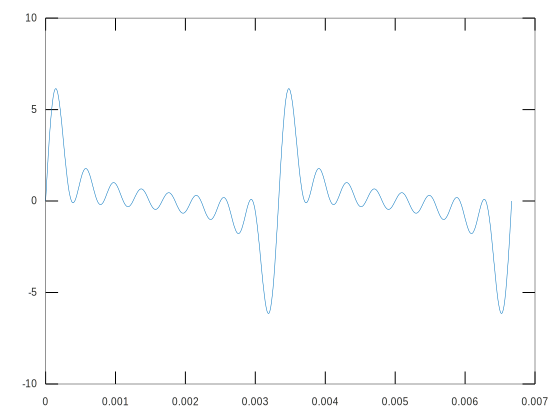

In [7]:
plot(TimeCV, RefSigAllCoreCV)

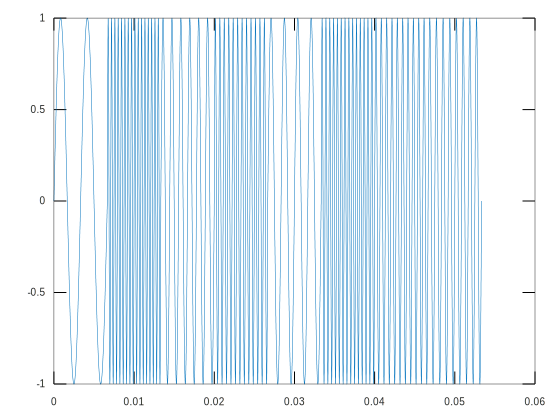

In [8]:
plot(TimeLongCV, RefSigCoreCV)

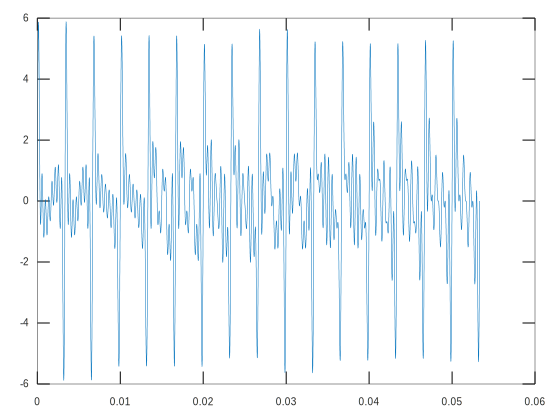

In [9]:
plot(TimeLongCV, RefSigInvCoreCV)

In [10]:
# Need raised cosine for sampling subpulse
RaisedCosineCV = (1 - cos(2*pi*TimeCV*deltaFcostas*pulseSamples/(rows(TimeCV)-1)))/2;
size(RaisedCosineCV)

ans =

   2049      1



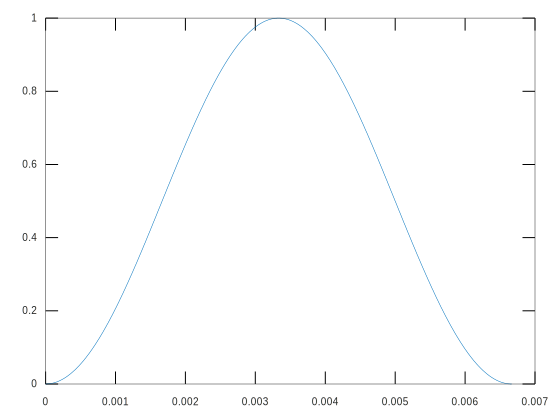

In [11]:
plot(TimeCV, RaisedCosineCV)

In [12]:
# Each column represents freq response at a given moment in time
Resp = [];
InvResp = [];
fracSubPulse = 4; # Must be a power of 2
indexIncr = pulseSamples/fracSubPulse;
freqOvr = 2; # Must be a power of 2
i = 1;
for idx = 1:indexIncr:rows(RefSigCoreCV)-(rows(RaisedCosineCV)-1)
  SigLoopCV = [RefSigCoreCV(idx:idx+rows(RaisedCosineCV)-1) .* RaisedCosineCV](1:end-1);
  FftLoopCV = fftshift(fft(SigLoopCV, rows(SigLoopCV)*freqOvr+1));
  Resp = horzcat(Resp, FftLoopCV);
  FreqLoopCV = linspace(-sampleRate/2, sampleRate/2, rows(FftLoopCV));
  SigLoopCV = [RefSigInvCoreCV(idx:idx+rows(RaisedCosineCV)-1) .* RaisedCosineCV](1:end-1);
  FftLoopInvCV = fftshift(fft(SigLoopCV, rows(SigLoopCV)*freqOvr+1));
  InvResp = horzcat(InvResp, FftLoopInvCV);
%   figure();
%   subplot(2, 1, 1)
%   plot(FreqLoopCV, abs(FftLoopCV))
%   title(sprintf("Figure %d", i))
%   grid on
%   grid minor
%   axis([-600 +3300], "tic")
%   subplot(2, 1, 2)
%   plot(FreqLoopCV, abs(FftLoopInvCV))
%   grid on
%   grid minor
%   axis([-600 +3300], "tic")
  i++;
endfor
size(Resp)
size(InvResp)

ans =

   4097     57

ans =

   4097     57



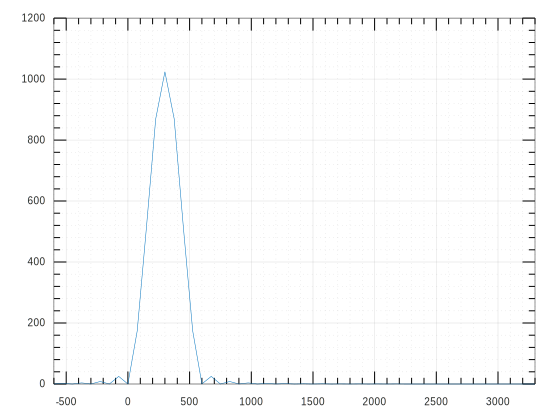

In [13]:
plot(FreqLoopCV, abs(Resp(:,1)))
grid on
grid minor
axis([-600 +3300], "tic")

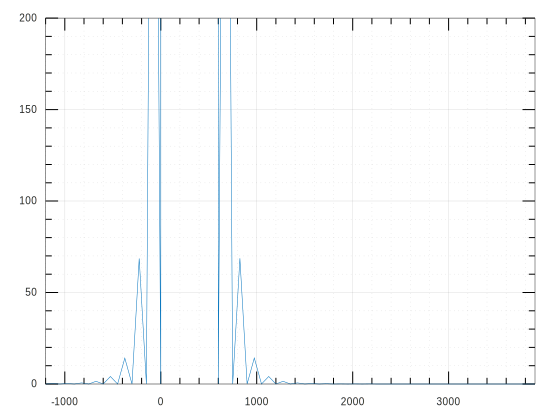

In [14]:
Resp1 = Resp(:,1);
E = Resp1 .* conj(Resp1);
plot(FreqLoopCV, E)
grid on
grid minor
axis([-1200 +3900 0 200], "tic")

In [17]:
E = Resp .* conj(Resp);
size(E)
Esort = sort(E(:));
size(Esort)

ans =

   4097     57

ans =

   233529        1



In [18]:
Ecumm = zeros(rows(Esort), 1);
size(Ecumm)
size(E)
Ecumm(1) = Esort(1);
for i = 2:rows(Esort)
  Ecumm(i) = Ecumm(i-1) .+ Esort(i);
endfor
size(Ecumm)

ans =

   233529        1

ans =

   4097     57

ans =

   233529        1



In [15]:
pkg load signal
[PeaksCV idxPeaksCV] = findpeaks(E, "MinPeakHeight", 4)

PeaksCV =

   4.1090e+00
   1.4170e+01
   6.8572e+01
   6.1694e+02
   1.0486e+06
   6.1857e+02
   6.8693e+01
   1.4189e+01
   4.1134e+00

idxPeaksCV =

   2042
   2044
   2046
   2048
   2053
   2058
   2060
   2062
   2064



In [16]:
size(E)

ans =

   4097      1



In [18]:
sum(E)

ans =    3.1465e+06


In [41]:
Esort = sort(E);
Ecumm = zeros(rows(Esort), 1);
size(Ecumm)
size(E)
Ecumm(1) = Esort(1);
for i = 2:rows(Esort)
  Ecumm(i) = Ecumm(i-1) .+ Esort(i);
endfor
size(Ecumm)

ans =

   4097      1

ans =

   4097      1

ans =

   4097      1



In [43]:
Ecumm(1:10,1)
Esort(1:10,1)
Ecumm(end)

ans =

   1.7779e-29
   1.0100e-19
   2.0341e-19
   1.1185e-18
   2.0369e-18
   4.5658e-18
   7.1143e-18
   1.2101e-17
   1.7112e-17
   2.5296e-17

ans =

   1.7779e-29
   1.0100e-19
   1.0241e-19
   9.1513e-19
   9.1834e-19
   2.5289e-18
   2.5485e-18
   4.9863e-18
   5.0113e-18
   8.1840e-18

ans =    3.1465e+06


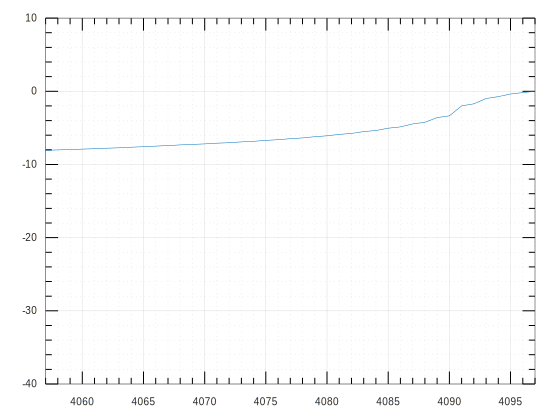

In [56]:
plot(1:1:rows(Ecumm), log10(Ecumm/sum(E)))
grid on
grid minor
axis([rows(Ecumm)-40 rows(Ecumm) ], "tic")

In [55]:
Elog = log10(Ecumm/sum(E));

In [17]:
FreqLoopCV(idxPeaksCV)

ans =

   -525   -375   -225    -75    300    675    825    975   1125



In [18]:
find(-675 == FreqLoopCV)

ans =  2040


In [19]:
find(3375 == FreqLoopCV)

ans =  2094


In [20]:
Epart = Resp(2040:2094,:);
size(Epart)

ans =

   55   15



In [21]:
E = Epart .* conj(Epart);
size(E)

ans =

   55   15



In [22]:
Z = conv2(Resp .* conj(Resp), conj(rot90(E,2)), 'valid');

In [23]:
size(Z)

ans =

   4043      1



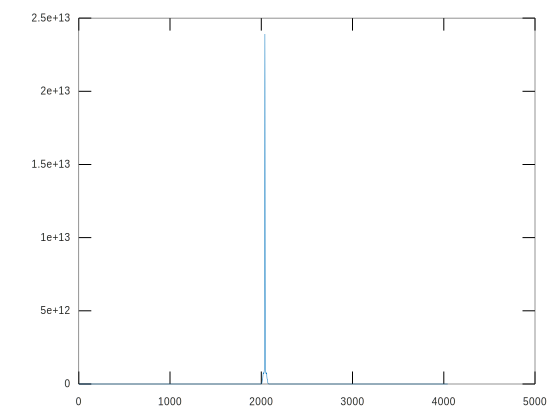

In [24]:
plot(Z)

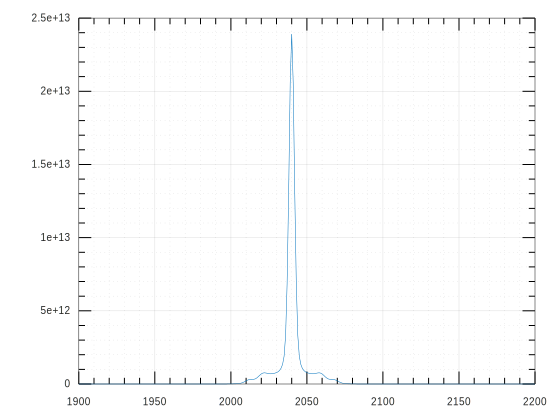

In [25]:
plot(Z)
grid on
grid minor
axis([1900 2200], "tic")

In [26]:
find(max(Z) == Z)

ans =  2040


In [27]:
FreqLoopCV(ans)

ans = -675


In [28]:
EInvpart = InvResp(2040:2094,:);
size(EInvpart)

ans =

   55   15



In [29]:
EInv = EInvpart .* conj(EInvpart);
size(E)

ans =

   55   15



In [30]:
ZInv = conv2(Resp .* conj(Resp), conj(rot90(EInv,2)), 'valid');
size(ZInv)

ans =

   4043      1



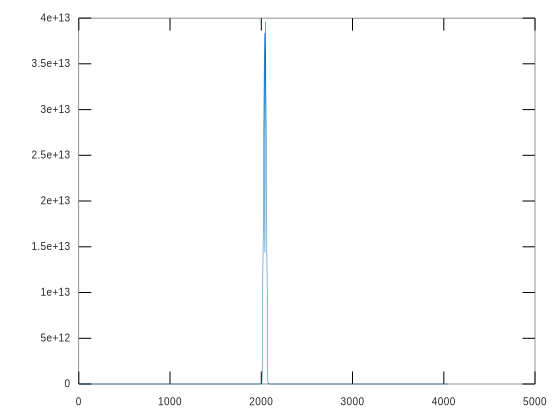

In [31]:
plot(ZInv)

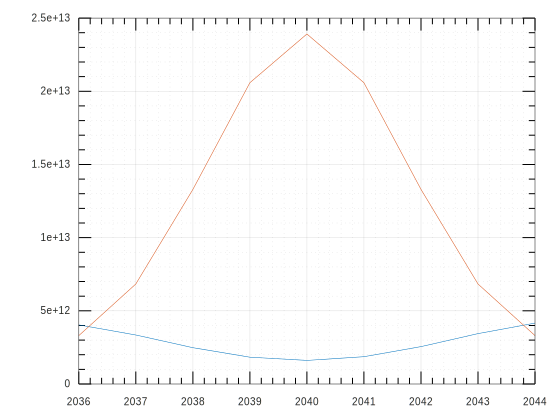

In [32]:
plot(1:1:rows(ZInv), ZInv/8.8902, Z)
grid on
grid minor
axis([2040-4 2040+4 ], "tic")

In [33]:
# Each column represents freq response at a given moment in time
Resp2 = [];
fracSubPulse = 1; # Must be a power of 2
indexIncr = pulseSamples/fracSubPulse;
freqOvr = 2; # Must be a power of 2
i = 1;
for idx = 1:indexIncr:rows(RefSigCoreCV)-(rows(RaisedCosineCV)-1)
  SigLoopCV = [RefSigAllCoreCV .* RaisedCosineCV](1:end-1);
  FftLoopCV = fftshift(fft(SigLoopCV, rows(SigLoopCV)*freqOvr+1));
  Resp2 = horzcat(Resp2, FftLoopCV);
%   figure();
%   subplot(2, 1, 1)
%   plot(FreqLoopCV, abs(FftLoopCV))
%   title(sprintf("Figure %d", i))
%   grid on
%   grid minor
%   axis([-600 +3300], "tic")
%   subplot(2, 1, 2)
%   plot(FreqLoopCV, abs(FftLoopInvCV))
%   grid on
%   grid minor
%   axis([-600 +3300], "tic")
  i++;
endfor
size(Resp2)

ans =

   4097     15



In [34]:
Z = conv2(Resp2 .* conj(Resp2), conj(rot90(E,2)), 'valid');
size(Z)

ans =

   4043      1



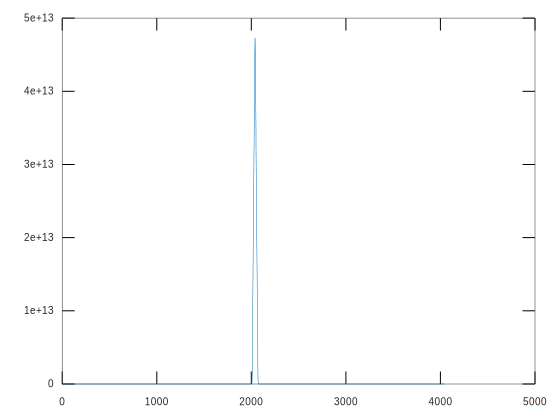

In [35]:
plot(Z)

In [36]:
ZInv = conv2(Resp2 .* conj(Resp2), conj(rot90(EInv,2)), 'valid');
size(ZInv)

ans =

   4043      1



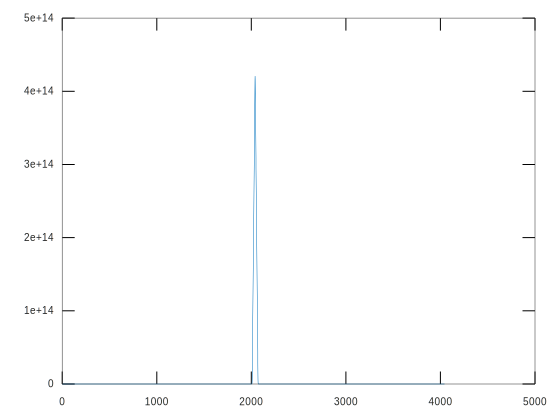

In [37]:
plot(ZInv)

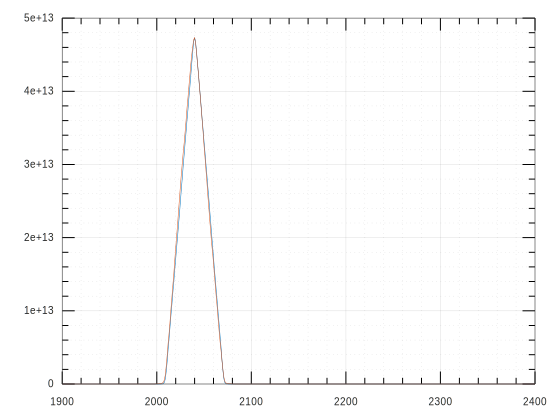

In [38]:
plot(1:1:rows(ZInv), ZInv/8.8902, Z)
grid on
grid minor
axis([1900 2400], "tic")

In [39]:
max(Z)/max(ZInv)

ans =  0.11248


In [40]:
max(Z)

ans =    4.7321e+13


In [41]:
max(ZInv)

ans =    4.2069e+14


In [42]:
max(ZInv)/max(Z)

ans =  8.8902
